<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Uber_NYC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn

Dataset shape: (1028136, 4)
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

Total pickups: 1028136

Top 5 days with most pickups:
 Day
13    43205
5     42319
19    41017
6     40520
18    40274
Name: count, dtype: int64

Pickups per weekday:
 Weekday
Tuesday      163230
Saturday     162057
Friday       160380
Thursday     153276
Monday       137288
Wednesday    135373
Sunday       116532
Name: count, dtype: int64

Pickups per hour:
 Hour
0     24133
1     16107
2     10702
3     10789
4     12675
5     20262
6     33307
7     43314
8     44477
9     38542
10    37634
11    38821
12    39193
13    45042
14    52643
15    61219
16    68224
17    73373
18    75040
19    69660
20    63988
21    60606
22    51817
23    36568
Name: count, dtype: int64


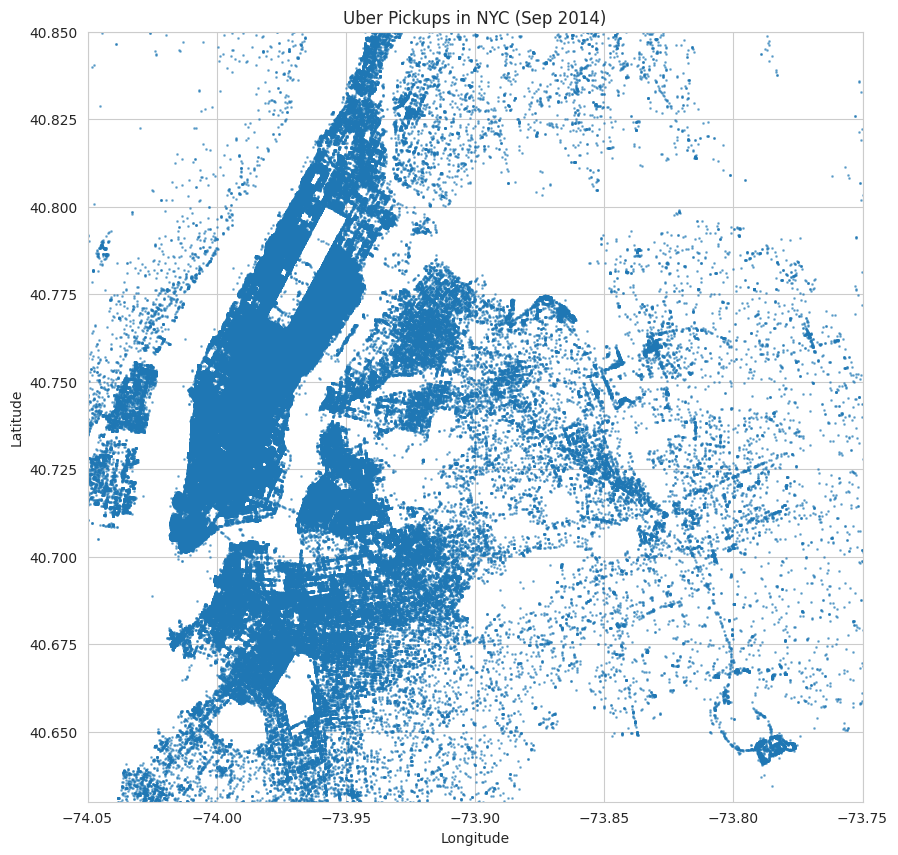

<ipython-input-2-bb8997cbbb91>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekday', order=order, palette='viridis')


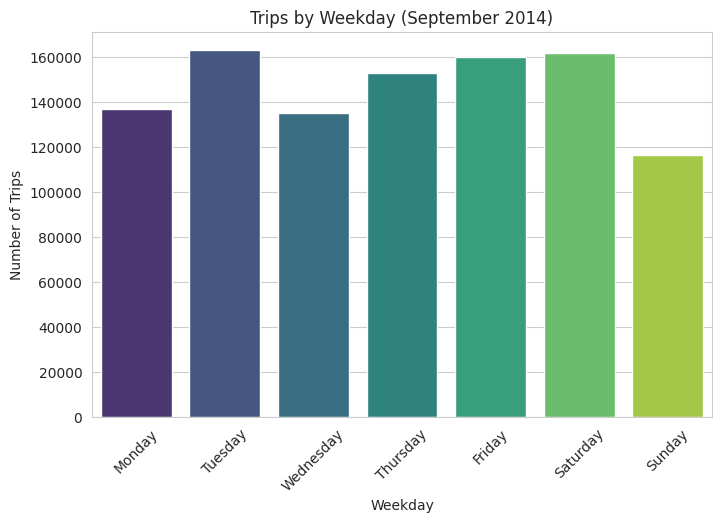

<ipython-input-2-bb8997cbbb91>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='magma')


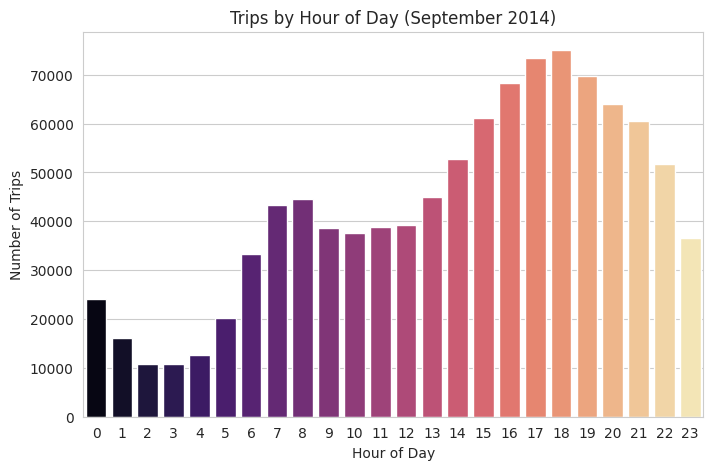

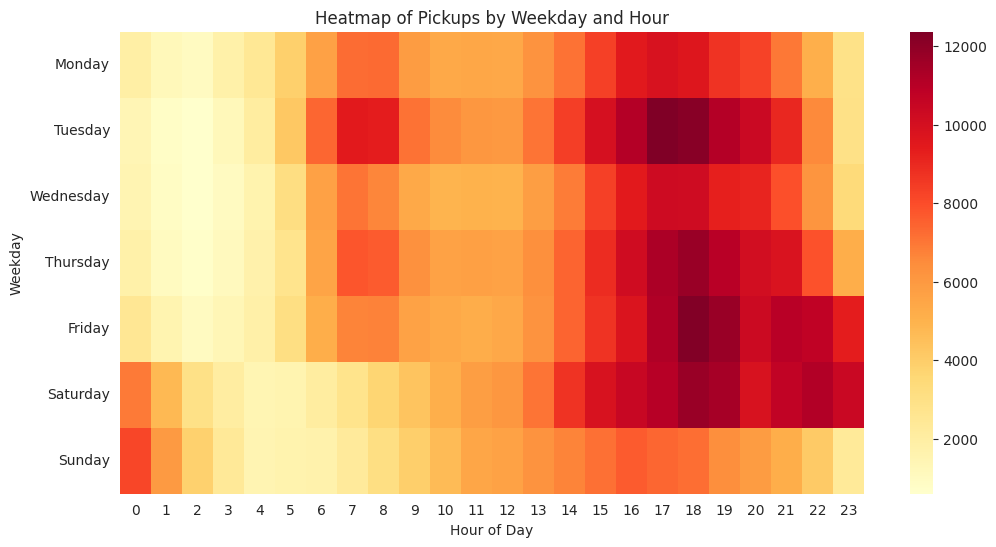

In [ ]:
# Uber Ride Data Analysis (September 2014)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plots
sns.set_style('whitegrid')

# Load data
df = pd.read_csv('/content/uber-raw-data-sep14.csv')

# Data overview
print("Dataset shape:", df.shape)
print(df.head())

# Data Cleaning
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract features from datetime
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour

# Basic Statistics
print("\nTotal pickups:", len(df))
print("\nTop 5 days with most pickups:\n", df['Day'].value_counts().head())
print("\nPickups per weekday:\n", df['Weekday'].value_counts())
print("\nPickups per hour:\n", df['Hour'].value_counts().sort_index())

# Plot 1 - Pickup Locations Scatter Plot
plt.figure(figsize=(10, 10))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.5)
plt.title('Uber Pickups in NYC (Sep 2014)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)
plt.show()

# Plot 2 - Trips by Weekday
plt.figure(figsize=(8,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Weekday', order=order, palette='viridis')
plt.title('Trips by Weekday (September 2014)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Plot 3 - Trips by Hour
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Hour', palette='magma')
plt.title('Trips by Hour of Day (September 2014)')
plt.ylabel('Number of Trips')
plt.xlabel('Hour of Day')
plt.show()

# Plot 4 - Heatmap of pickups (optional)
plt.figure(figsize=(12,6))
pivot = df.pivot_table(index='Weekday', columns='Hour', values='Lat', aggfunc='count').fillna(0)
pivot = pivot.reindex(order)
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Heatmap of Pickups by Weekday and Hour')
plt.ylabel('Weekday')
plt.xlabel('Hour of Day')
plt.show()